# Deciding on a primary metric

As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.

- A model predicting if a customer is a high-value lead for a sales team with limited capacity.

# Assessing a diabetes prediction classifier

In this chapter you'll work with the `diabetes_df` dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

In [3]:
import pandas as pd

diabetes_df = pd.read_csv("dataset/diabetes_clean.csv")
diabetes_df.columns
y = diabetes_df['diabetes'].values
X = diabetes_df.drop('diabetes', axis=1).values

In [4]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[99 24]
 [35 34]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       123
           1       0.59      0.49      0.54        69

    accuracy                           0.69       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.68      0.69      0.69       192



c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Building a logistic regression model

In this exercise, you will build a logistic regression model using all features in the `diabetes_df` dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

In [5]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.27140165 0.18792036 0.10916895 0.15182959 0.47794907 0.44455509
 0.01409493 0.62427854 0.56285382 0.78384618]


c:\Users\88016\anaconda3\envs\env_py\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# The ROC curve

Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, `y_test`, and the predicted probabilities of the test features belonging to the positive class, `y_pred_probs`

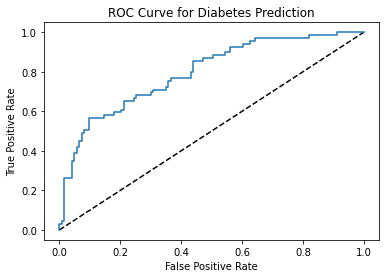

In [7]:
import matplotlib.pyplot as plt
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

# ROC AUC

The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

In [8]:
y_pred = logreg.predict(X_test)
# Import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7950983857664663
[[95 28]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



# Hyperparameter tuning with GridSearchCV

Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the `diabetes_df` dataset.

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso()


In [12]:
import numpy as np
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.10527210526315789}
Tuned lasso score: 0.2782860454530926


# Hyperparameter tuning with RandomizedSearchCV

As you saw, `GridSearchCV` can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use `RandomizedSearchCV`, which tests a fixed number of hyperparameter settings from specified probability distributions.

In [20]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV
# Create the parameter space
params = {"penalty": [ "none","l2"], # 
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'tol': 0.30619183673469386, 'penalty': 'none', 'class_weight': 'balanced', 'C': 0.963265306122449}
Tuned Logistic Regression Best Accuracy Score: 0.763808095952024
